# Temel İstatistik Kavramları

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

## Sampling (Örnekleme)

In [2]:
populasyon = np.random.randint(0, 80, 10000)
populasyon.mean()

39.207

In [3]:
np.random.seed(115)
orneklem = np.random.choice(a=populasyon, size=100)
orneklem.mean()

39.05

- Uygun şartlar altında ve ana kitleyi iyi temsil ettiğini varsaydığımız örneklemin bize sunduğu daha az veri ile genellemeler yapabilmektir.

In [4]:
np.random.seed(10)

orneklem1 = np.random.choice(a=populasyon, size=100)
orneklem2 = np.random.choice(a=populasyon, size=100)
orneklem3 = np.random.choice(a=populasyon, size=100)
orneklem4 = np.random.choice(a=populasyon, size=100)
orneklem5 = np.random.choice(a=populasyon, size=100)
orneklem6 = np.random.choice(a=populasyon, size=100)
orneklem7 = np.random.choice(a=populasyon, size=100)
orneklem8 = np.random.choice(a=populasyon, size=100)
orneklem9 = np.random.choice(a=populasyon, size=100)
orneklem10 = np.random.choice(a=populasyon, size=100)

(orneklem1.mean() + orneklem2.mean() + orneklem3.mean() + orneklem4.mean() + orneklem5.mean() + 
 orneklem6.mean() + orneklem7.mean() + orneklem8.mean() + orneklem9.mean() + orneklem10.mean()) / 10

39.666999999999994

## Betimsel İstatistikler (Descriptive Statistics)

In [5]:
df = sns.load_dataset("tips")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.00000,19.78594,8.90241,3.07000,13.34750,17.79500,24.12750,50.81000
tip,244.00000,2.99828,1.38364,1.00000,2.00000,2.90000,3.56250,10.00000
size,244.00000,2.56967,0.95110,1.00000,2.00000,2.00000,3.00000,6.00000


## Güven Aralıkları (Confidence Intervals)
- Anakütle parametresinin tahmini değerini kapsayabilecek iki sayıdan oluşan bir aralık bulunmasıdır.

In [6]:
sms.DescrStatsW(df["total_bill"]).tconfint_mean()

(18.663331704358473, 20.908553541543167)

- Hesap ortalamaları istatiski olarak %5 yanılma payı ile 18 ile 21 arasındadır.

In [7]:
sms.DescrStatsW(df["tip"]).tconfint_mean()

(2.8237993062818205, 3.172758070767359)

In [8]:
df = sns.load_dataset("titanic")
sms.DescrStatsW(df["age"].dropna()).tconfint_mean()

(28.631790041821507, 30.766445252296133)

In [9]:
sms.DescrStatsW(df["fare"].dropna()).tconfint_mean()

(28.93683123456734, 35.47158470258195)

## Korelasyon (Correlation)
- Değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatistiksel bir yöntemdir.

In [10]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99000,1.01000,Female,No,Sun,Dinner,2
1,10.34000,1.66000,Male,No,Sun,Dinner,3
2,21.01000,3.50000,Male,No,Sun,Dinner,3
3,23.68000,3.31000,Male,No,Sun,Dinner,2
4,24.59000,3.61000,Female,No,Sun,Dinner,4


In [11]:
df["total_bill"] = df["total_bill"] - df["tip"]

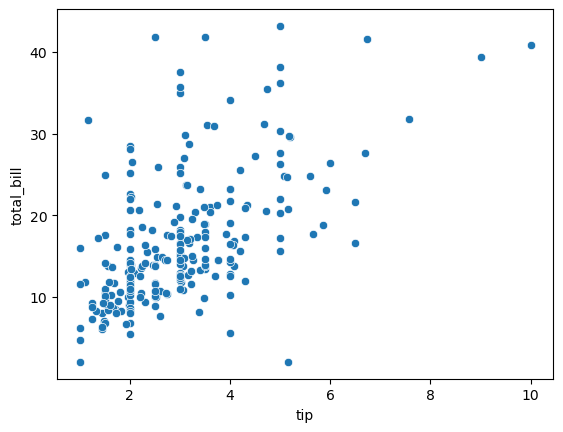

In [12]:
sns.scatterplot(data=df, x="tip", y="total_bill")
plt.show()

In [13]:
 df["tip"].corr(df["total_bill"])

0.5766634471096382

## Hipotez Testleri
- Hipotez : Bir inanışı, savı test etmek için kullanılan istatistiksel yöntemlerdir.
- Grup karşılaştırmalarında temel amaç olası farklılıkların şans eseri ortaya çıkığ çıkmadığını göstermeye çalışmaktır.
### AB Testi Bağımsız İki Örneklem T Testi
- İki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.
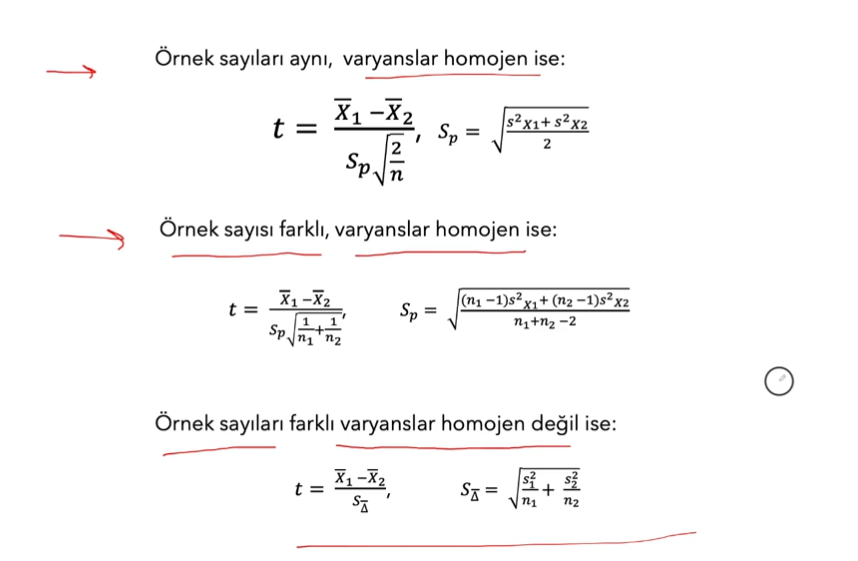

- !! Normallik Varsayımı
- !! Varyans Homejenliği

1. Hipotez kur
2. Varsayımları incele
3. P-Value incele

1. Hipotezleri Kur
2. Varsayım Kontrolü
    1. Normallik Varsayımı
    2. Varyans Homojenliği
3. Hipotezin Uygulanması
    1. Varsayımlar sağlanıyorsa bağımsız 2 örneklem t testi (parametrik)
    2. Varsayımlar sağlanmıyorsa mannwhitneyu testi (non-parametrik)
- Not : Normallik sağlanmıyorsa direk 2 numara. Varyans homojenliği sağlanmıyorsa 1 numaraya argüman girilir.
- Not : Normallik incelemesi öncesi aykırı değer incelemesi ve düzeltmesi yapmak faydalı olabilir.

### Uygulama 1: Sigara içenler ile içmeyenlerin hesap ortalamaları arasında ista. olarak anlamlı bir fark var mı?

In [14]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99000,1.01000,Female,No,Sun,Dinner,2
1,10.34000,1.66000,Male,No,Sun,Dinner,3
2,21.01000,3.50000,Male,No,Sun,Dinner,3
3,23.68000,3.31000,Male,No,Sun,Dinner,2
4,24.59000,3.61000,Female,No,Sun,Dinner,4


In [15]:
df.groupby("smoker").agg({"total_bill": ["mean"]})

,total_bill
,mean
smoker,
Yes,20.75634
No,19.18828


## 1. Hipotezi Kur 
## Ho : M1=M2
## Ha : M1!=M2

## 2. Varsayım Kontrolü
    1. Normallik Varsayımı
    2. Varyans Homojenliği

In [16]:
# Ho: Normal dağılım varsayımı sağlanmaktadır
# Ha: sağlanmamaktadır.
test_stat, pvalue = shapiro(df.loc[df["smoker"] == "Yes", "total_bill"])
print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# p vcalue < 0.05 ise Ho red
# Ho hipotezi red edildi.

Test Stat = 0.9367, pvalue = 0.0002


In [17]:
# Ho: Normal dağılım varsayımı sağlanmaktadır
# Ha: sağlanmamaktadır.
test_stat, pvalue = shapiro(df.loc[df["smoker"] == "No", "total_bill"])
print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# p vcalue < 0.05 ise Ho red
# Ho hipotezi red edildi.

Test Stat = 0.9045, pvalue = 0.0000


- Normallik Varsayımının doğru olduğunu kabul edip devam ediyoruz.
## Varyans homojenliği Varsayımı

In [18]:
# Ho: Varyanslar homojendir
# Ha: Varyanslar homojen değildir.
test_stat, pvalue = levene(df.loc[df["smoker"]=="Yes", "total_bill"],
                          df.loc[df["smoker"]=="No", "total_bill"])
print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# p value < 0.05 ise Ho red
# Ho hipotezi red edildi

Test Stat = 4.0537, pvalue = 0.0452


3. Hipotezin Uygulanması
    1. Parametrik test
    2. Non Parametrik Test

1. Parametrik Test:

In [19]:
test_stat, pvalue = ttest_ind(df.loc[df["smoker"]=="Yes", "total_bill"],
                          df.loc[df["smoker"]=="No", "total_bill"], equal_var=True) # varyans homojenliği sağlanmıyorsa False girilmeli
print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# p-value < 0.05 ise Ho Red
# Ho red edilemez
# 2 grup arasında istatistiki olarak bir fark yoktur

Test Stat = 1.3384, pvalue = 0.1820


2. Non Parametrik Test

In [20]:
test_stat, pvalue = mannwhitneyu(df.loc[df["smoker"]=="Yes", "total_bill"],
                                 df.loc[df["smoker"]=="No", "total_bill"])
print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# Ho red edilemez

Test Stat = 7531.5000, pvalue = 0.3413


## Uygulama 2: Titanic Kadın ve Erkek yolcuların yaş ortalamaları arasında istatiksel olarak anlamlı bir fark var mıdır?

In [21]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00000,1,0,7.25000,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00000,1,0,71.28330,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00000,0,0,7.92500,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00000,1,0,53.10000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00000,0,0,8.05000,S,Third,man,True,NaN,Southampton,no,True


In [22]:
df.groupby("sex").agg({"age": "mean"})

,age
sex,
female,27.91571
male,30.72664


#### Adım 1. Hipotezleri Kur:
- Ho: Kadın ve erkek yolcuların yaş ortalamaları arasında fark yoktur. M! = M2
- Ha: Kadın ve erkek yolcuların yaş ortalamaları arasında fark vardır. M1 != M2

#### Adım 2. Varsayımları İncele
- Normallik Varsayımı

In [23]:
# Ho: Normal dağılım varsayımı sağlanmaktadır
# Ha: sağlanmamaktadır.
test_stat, pvalue = shapiro(df.loc[df["sex"] == "female", "age"].dropna())
print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# p value < 0.05 ise Ho red
# Ho red edildi

Test Stat = 0.9848, pvalue = 0.0071


In [24]:
# Ho: Normal dağılım varsayımı sağlanmaktadır
# Ha: sağlanmamaktadır.
test_stat, pvalue = shapiro(df.loc[df["sex"] == "male", "age"].dropna())
print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# p value < 0.05 ise Ho red
# Ho red edildi

Test Stat = 0.9747, pvalue = 0.0000


- Varyans Homojenliği

In [25]:
# Ho: Varyanslar homojendir
# Ha: Varyanslar homojen değildir.
test_stat, pvalue = levene(df.loc[df["sex"]=="male", "age"].dropna(),
                          df.loc[df["sex"]=="female", "age"].dropna())
print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# p value < 0.05 ise Ho red
# Ho hipotezi red edilemez

Test Stat = 0.0013, pvalue = 0.9712


### Varyanslar sağlanmadığı için nonparametrik test uygulanır.

In [26]:
test_stat, pvalue = mannwhitneyu(df.loc[df["sex"]=="female", "age"].dropna(),
                                 df.loc[df["sex"]=="male", "age"].dropna())
print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# Ho red edildi
# Yaşlar arasında ist. olarak fark vardır.

Test Stat = 53212.5000, pvalue = 0.0261


### Uygulama 3: Fiyabet hastası olan ve olmayanların yaşları arasında ist. olarak fark var mıdır?

In [27]:
df = pd.read_csv("C:/measurement_problems/datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60000,0.62700,50,1
1,1,85,66,29,0,26.60000,0.35100,31,0
2,8,183,64,0,0,23.30000,0.67200,32,1
3,1,89,66,23,94,28.10000,0.16700,21,0
4,0,137,40,35,168,43.10000,2.28800,33,1


## Adım 1. Hipotezleri Kur:
- M1=M2 (Diyabet hastası olan ve olamayanların yaşları arasında isst. olarak fark yoktur.)
- M1!=M2 (...fark vardır)

In [28]:
df.groupby("Outcome").agg({"Age": "mean"})

,Age
Outcome,
0,31.19000
1,37.06716


### Adım 2. Varsayım Kontrolü
- Normallik Varsayımı

In [29]:
test_stat, pvalue = shapiro(df.loc[df["Outcome"]==1, "Age"].dropna())
print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# Normal dağılıma uygun değil

Test Stat = 0.9546, pvalue = 0.0000


In [30]:
test_stat, pvalue = shapiro(df.loc[df["Outcome"]==0, "Age"].dropna())
print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# Normal dağılıma uygun değil

Test Stat = 0.8012, pvalue = 0.0000


### Adım 3. NonParametrik Test

In [31]:
test_stat, pvalue = mannwhitneyu(df.loc[df["Outcome"]==0, "Age"].dropna(),
                                 df.loc[df["Outcome"]==1, "Age"].dropna())
print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# Ho red edildi
# Yaşlar arasında ist. olarak fark vardır.

Test Stat = 41950.0000, pvalue = 0.0000


### Uygulama 4: Kursun büyük çoğunluğunu izleyenler ile izlemeyenlerin puanları birbirinden farklı mı?
- Ho: M1=M2
- Ha: M1!=M2

In [32]:
df = pd.read_csv("C:/measurement_problems/datasets/course_reviews.csv")
df.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.00000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.00000,0.00000,0.00000
1,5.00000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.00000,0.00000,0.00000
2,4.50000,2021-02-04 20:34:03,2019-07-04 23:23:27,1.00000,0.00000,0.00000
3,5.00000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.00000,0.00000,0.00000
4,4.00000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.00000,0.00000,0.00000


In [33]:
df.loc[df["Progress"]>75, "Rating"].mean()

4.860491071428571

In [34]:
df.loc[df["Progress"]<25, "Rating"].mean()

4.7225029148853475

In [35]:
df.loc[df["Progress"]<10, "Rating"].mean()

4.700895713371721

In [36]:
test_stat, pvalue = shapiro(df.loc[df["Progress"]>75, "Rating"])
print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# Normal değil

Test Stat = 0.3160, pvalue = 0.0000


In [37]:
test_stat, pvalue = shapiro(df.loc[df["Progress"]<25, "Rating"])
print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# Normal değil

Test Stat = 0.5710, pvalue = 0.0000


In [38]:
test_stat, pvalue = mannwhitneyu(df.loc[df["Progress"]>75, "Rating"],
                                df.loc[df["Progress"]<25, "Rating"])
print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# Ho red edildi
# İzleme durumları arasında rating ile ilgili bir fark vardır..

Test Stat = 661481.5000, pvalue = 0.0000


# iki Grup Oran Karşılaştırma
- Ho: p1=p2 (Yeni tasarımın dönüşüm oranı ile eski tasarımın dönüşüm oranı arsında ist. olarak fark yoktur.)
- Ha: p1!=p2 (...vardır.)

In [39]:
basari_sayisi = np.array([300, 250])
gozlem_sayilari = np.array([1000, 1100])

In [40]:
proportions_ztest(count=basari_sayisi, nobs=gozlem_sayilari)
# p value 0.05'ten küçük
# Anlamlı bir fark vardır.

(3.7857863233209255, 0.0001532232957772221)

In [41]:
basari_sayisi / gozlem_sayilari

array([0.3       , 0.22727273])

### Uygulama: Kadın ve erkeklerin hayatta kalma oranları arasında ist. olarak fark var mıdır?
- Ho: p1=p2
- Ha: p1!=p2

In [42]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00000,1,0,7.25000,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00000,1,0,71.28330,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00000,0,0,7.92500,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00000,1,0,53.10000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00000,0,0,8.05000,S,Third,man,True,NaN,Southampton,no,True


In [43]:
df.loc[df["sex"]=="female"].agg({"survived": "mean"})

survived   0.74204
dtype: float64

In [44]:
female_succ_count = df.loc[df["sex"]=="female", "survived"].sum()
male_succ_count = df.loc[df["sex"]=="male", "survived"].sum()

test_stat, pvalue = proportions_ztest(count=[female_succ_count, male_succ_count],
                                     nobs=[df.loc[df["sex"]=="female", "survived"].shape[0],
                                          df.loc[df["sex"]=="male", "survived"].shape[0]])
print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# Ho red
# Fark vardır.

Test Stat = 16.2188, pvalue = 0.0000


# İkiden Fazla Grup Ortalaması Karşılaştırma (Anova - Anlaysis of Variance)
- Ho: m1=m2=m3

In [45]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99000,1.01000,Female,No,Sun,Dinner,2
1,10.34000,1.66000,Male,No,Sun,Dinner,3
2,21.01000,3.50000,Male,No,Sun,Dinner,3
3,23.68000,3.31000,Male,No,Sun,Dinner,2
4,24.59000,3.61000,Female,No,Sun,Dinner,4


#### Haftanın günleri arasında ödenen hesap arasında ist. olarak fark var mıdır?

In [46]:
df.groupby("day")["total_bill"].mean()

day
Thur   17.68274
Fri    17.15158
Sat    20.44138
Sun    21.41000
Name: total_bill, dtype: float64

- Ho: m1=m2=m3=m4
- Ha: fark vardır.

#### 2. Varsayım Kontrolü
- Varsayım sağlanıyorsa one way anova
- Sağlanmıyorsa kruskal

In [49]:
for group in list(df["day"].unique()):
    pvalue = shapiro(df.loc[df["day"]==group, "total_bill"])[1]
    print(group, "p-value: %.4f" % pvalue)

# Ho red edildi
# Normallik varsayımı sağlanmıyor

Sun p-value: 0.0036
Sat p-value: 0.0000
Thur p-value: 0.0000
Fri p-value: 0.0409


In [51]:
pvalue = shapiro(df["total_bill"])[1]
pvalue

3.3244529351605934e-10

In [54]:
test_stat, pvalue = levene(df.loc[df["day"]=="Sun", "total_bill"],
                          df.loc[df["day"]=="Sat", "total_bill"],
                          df.loc[df["day"]=="Thur", "total_bill"],
                          df.loc[df["day"]=="Fri", "total_bill"])

print("Test Stat = %.4f, pvalue = %.4f" % (test_stat, pvalue))
# Ho red edilemez
# Varysan homojenliği vardır

Test Stat = 0.6654, pvalue = 0.5741


In [55]:
df.groupby("day").agg({"total_bill": ["mean", "median"]})

total_bill         
           mean   median
day                     
Thur   17.68274 16.20000
Fri    17.15158 15.38000
Sat    20.44138 18.24000
Sun    21.41000 19.63000

In [56]:
# Parametrik Anova Testi

f_oneway(df.loc[df["day"]=="Sun", "total_bill"],
                df.loc[df["day"]=="Sat", "total_bill"],
                df.loc[df["day"]=="Thur", "total_bill"],
                df.loc[df["day"]=="Fri", "total_bill"])

# Ho red edildi
# ist. olarak fark vardır

F_onewayResult(statistic=2.7674794432863363, pvalue=0.04245383328952047)

In [57]:
# Non Parametrik Anova Testi

kruskal(df.loc[df["day"]=="Sun", "total_bill"],
                df.loc[df["day"]=="Sat", "total_bill"],
                df.loc[df["day"]=="Thur", "total_bill"],
                df.loc[df["day"]=="Fri", "total_bill"])

# Ho red edildi
# ist. olarak fark vardır

KruskalResult(statistic=10.403076391436972, pvalue=0.015433008201042065)

#### Farklılık Hangi Gruptan Kaynaklanıyor?

In [59]:
from statsmodels.stats.multicomp import MultiComparison

comparison = MultiComparison(df["total_bill"], df["day"])
tukey = comparison.tukeyhsd(0.05)

In [60]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Fri,Sat,3.2898,0.4541,-2.4799,9.0595,False
Fri,Sun,4.2584,0.2371,-1.5856,10.1025,False
Fri,Thur,0.5312,0.9957,-5.4434,6.5057,False
Sat,Sun,0.9686,0.8968,-2.6088,4.546,False
Sat,Thur,-2.7586,0.2374,-6.5455,1.0282,False
Sun,Thur,-3.7273,0.0668,-7.6264,0.1719,False


In [61]:
comparison = MultiComparison(df["total_bill"], df["day"])
tukey = comparison.tukeyhsd(0.1)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Fri,Sat,3.2898,0.4541,-1.8481,8.4277,False
Fri,Sun,4.2584,0.2371,-0.9457,9.4626,False
Fri,Thur,0.5312,0.9957,-4.7892,5.8515,False
Sat,Sun,0.9686,0.8968,-2.217,4.1543,False
Sat,Thur,-2.7586,0.2374,-6.1308,0.6135,False
Sun,Thur,-3.7273,0.0668,-7.1995,-0.255,True
